# Exploratory Factual Analysis

By Kishan Gupta

# Intern Dataset

In [32]:
import os
import pandas as pd
import seaborn as sns
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [20]:
df=pd.read_csv('intern_dataset.csv')

In [106]:
df.head(-5)

,Time,Signal1,Signal2,Label
0,2017-08-14 11:37:49.791,33668.091913,0.856726,A
1,2017-08-14 11:37:49.801,32564.903040,0.856705,A
2,2017-08-14 11:37:49.811,31454.043305,0.856683,A
3,2017-08-14 11:37:49.821,30335.387166,0.856659,A
4,2017-08-14 11:37:49.831,29207.142938,0.856634,A
...,...,...,...,...
911990,2020-01-04 10:55:49.136,34675.371705,0.151416,C
911991,2020-01-04 10:55:49.146,34675.490198,0.151415,C
911992,2020-01-04 10:55:49.156,34675.384968,0.151412,C
911993,2020-01-04 10:55:49.166,34675.056183,0.151408,C


In [22]:
print(df.shape)

(912000, 4)


In [23]:
print(df.columns)

Index(['Time', 'Signal1', 'Signal2', 'Label'], dtype='object')


In [24]:
df['Label'].value_counts()

A    318000
B    312000
C    282000
Name: Label, dtype: int64

# 2-D Scatter Plot

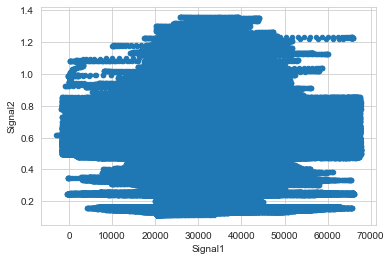

In [25]:
df.plot(kind='scatter',x='Signal1',y='Signal2')
plt.show()

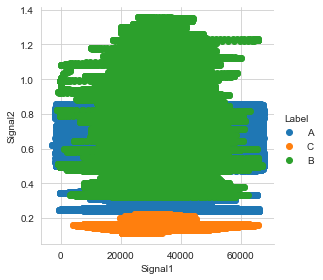

In [26]:
sns.set_style("whitegrid");
sns.FacetGrid(df, hue="Label",height=4) \
   .map(plt.scatter, "Signal1", "Signal2") \
   .add_legend();
plt.show();

Obervations:

1. Using Signal1 and Signal2 feature,we can distinguish Label 'C' from others.
2. Seperating Label 'A' and 'B' is much harder as they have considerable overlap.


# Pair-Plot

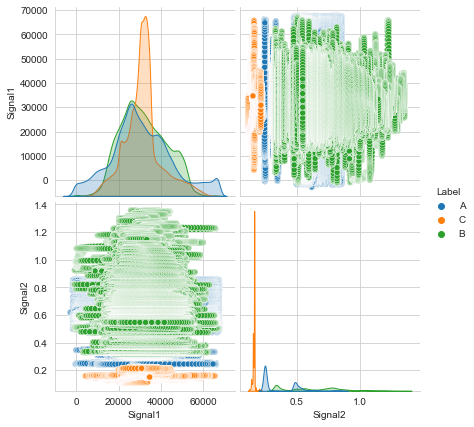

In [50]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(df,hue='Label',height=3);
plt.show()

Observations:
1. Signal2 is most useful feature to identify various Label types.
2. While Label 'C' can be easily separable, Labels 'A' and 'B' have some overlap
3. We can find "lines" and "if-else" conditions to build a simple model to classify the Label Type

# Histogram plot

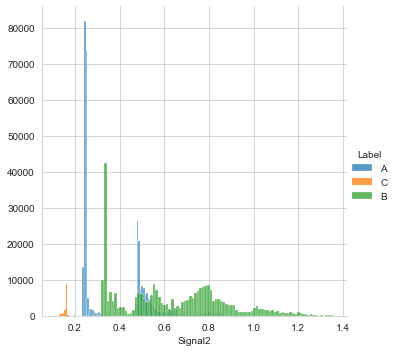

In [58]:
sns.FacetGrid(df,hue='Label',height=5) \
   .map(sns.histplot,"Signal2") \
   .add_legend();
plt.show()

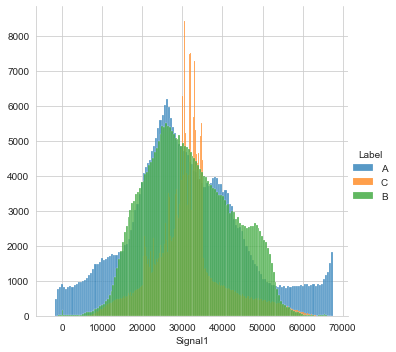

In [60]:
sns.FacetGrid(df,hue='Label',height=5) \
   .map(sns.histplot,"Signal1") \
   .add_legend();
plt.show()

# Cumulative Distribution Function(CDF)

In [63]:
df_A=df.loc[df["Label"]=="A"]
df_B=df.loc[df["Label"]=="B"]
df_C=df.loc[df["Label"]=="C"]

PDF and CDF for Label A

[0.56964465 0.01526101 0.         0.12892767 0.18242453 0.03355975
 0.02983962 0.00899057 0.01362579 0.01772642]
[0.23327995 0.29689782 0.36051568 0.42413355 0.48775142 0.55136929
 0.61498716 0.67860502 0.74222289 0.80584076 0.86945863]


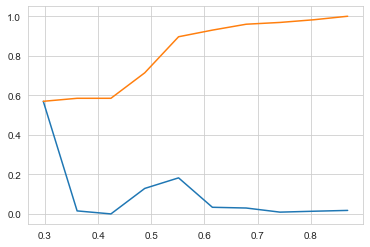

In [75]:
counts, bin_edges= np.histogram(df_A["Signal2"], bins=10,
                              density=True)
#compute PDF
pdf=counts/(sum(counts))
print(pdf)
print(bin_edges)

#compute CDF
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

plt.show()

PDF and CDF for Label C

[0.00925532 0.0226383  0.0702305  0.23486525 0.6377766  0.00839716
 0.00251064 0.00703191 0.00371986 0.00357447]
[0.11384072 0.12480902 0.13577733 0.14674564 0.15771394 0.16868225
 0.17965056 0.19061886 0.20158717 0.21255548 0.22352378]


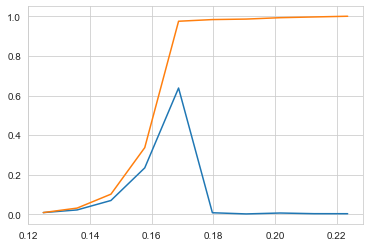

In [76]:
counts, bin_edges= np.histogram(df_C["Signal2"], bins=10,
                                density=True)
#compute PDF
pdf=counts/(sum(counts))
print(pdf)
print(bin_edges)

#compute CDF
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

plt.show()

PDF and CDF for Label B

[0.25875641 0.09780128 0.13772436 0.11057372 0.19901282 0.08852244
 0.04540705 0.03651603 0.02092628 0.00475962]
[0.31876442 0.42248991 0.5262154  0.62994088 0.73366637 0.83739186
 0.94111735 1.04484284 1.14856833 1.25229381 1.3560193 ]


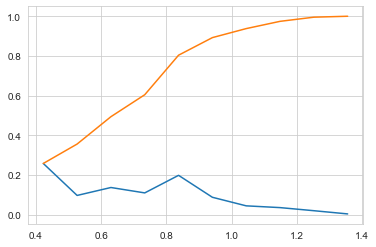

In [77]:
counts, bin_edges= np.histogram(df_B["Signal2"], bins=10,
                                density=True)
#compute PDF
pdf=counts/(sum(counts))
print(pdf)
print(bin_edges)

#compute CDF
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

plt.show()

[0.56964465 0.01526101 0.         0.12892767 0.18242453 0.03355975
 0.02983962 0.00899057 0.01362579 0.01772642]
[0.23327995 0.29689782 0.36051568 0.42413355 0.48775142 0.55136929
 0.61498716 0.67860502 0.74222289 0.80584076 0.86945863]
[0.00925532 0.0226383  0.0702305  0.23486525 0.6377766  0.00839716
 0.00251064 0.00703191 0.00371986 0.00357447]
[0.11384072 0.12480902 0.13577733 0.14674564 0.15771394 0.16868225
 0.17965056 0.19061886 0.20158717 0.21255548 0.22352378]
[0.25875641 0.09780128 0.13772436 0.11057372 0.19901282 0.08852244
 0.04540705 0.03651603 0.02092628 0.00475962]
[0.31876442 0.42248991 0.5262154  0.62994088 0.73366637 0.83739186
 0.94111735 1.04484284 1.14856833 1.25229381 1.3560193 ]


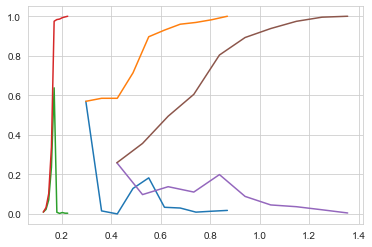

In [78]:
counts, bin_edges= np.histogram(df_A["Signal2"], bins=10,
                                density=True)
#compute PDF
pdf=counts/(sum(counts))
print(pdf)
print(bin_edges)

#compute CDF
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)


counts, bin_edges= np.histogram(df_C["Signal2"], bins=10,
                              density=True)
#compute PDF
pdf=counts/(sum(counts))
print(pdf)
print(bin_edges)

#compute CDF
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)


counts, bin_edges= np.histogram(df_B["Signal2"], bins=10,
                                density=True)
#compute PDF
pdf=counts/(sum(counts))
print(pdf)
print(bin_edges)

#compute CDF
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

plt.show()

# Mean , Variance and Std-Dev

In [79]:
print("Mean:")
print(np.mean(df_A["Signal2"]))
#mean with an outlier.
print(np.mean(np.append(df_A["Signal2"],912000)))
print(np.mean(df_C["Signal2"]))
print(np.mean(df_B["Signal2"]))

print("\nStd-dev:")
print(np.std(df_A["Signal2"]))
print(np.std(df_C["Signal2"]))
print(np.std(df_B["Signal2"]))

Mean:
0.37161237670875025
3.2395267178197007
0.15748234089798818
0.6422962833764072

Std-dev:
0.1572195975255273
0.010160998243529205
0.23830027255060982


# Median, Percentile, Quantile, IQR, MAD

In [90]:
print("\nMedians:")
print(np.median(df_A["Signal2"]),"of A")
#Median with an outlier
print("Median with an Outlier",np.median(np.append(df_A["Signal2"],912000)),"of A")
print(np.median(df_C["Signal2"]),"of C")
print(np.median(df_B["Signal2"]),"of B")

print("\nQuantiles:")
print(np.percentile(df_A["Signal2"],np.arange(0,100,25)),"of A")
print(np.percentile(df_C["Signal2"],np.arange(0,100,25)),"of C")
print(np.percentile(df_B["Signal2"],np.arange(0,100,25)),"of B")

print("\n90th Percentiles:")
print(np.percentile(df_A["Signal2"],90),"of A")
print(np.percentile(df_C["Signal2"],90),"of C")
print(np.percentile(df_B["Signal2"],90),"of B")

from statsmodels import robust
print("\nMedian Absolute Deviation:")
print(robust.mad(df_A["Signal2"]),"of A")
print(robust.mad(df_C["Signal2"]),"of C")
print(robust.mad(df_B["Signal2"]),"of B")

print("\nIQR:")
print(np.percentile(df_A["Signal2"],75)-np.percentile(df_A["Signal2"],25),"of A")
print(np.percentile(df_C["Signal2"],75)-np.percentile(df_C["Signal2"],25),"of C")
print(np.percentile(df_B["Signal2"],75)-np.percentile(df_B["Signal2"],25),"of B")


Medians:
0.25341075855293355 of A
Median with an Outlier 0.25341080759846124 of A
0.16020557117754225 of C
0.6352196941220647 of B

Quantiles:
[0.23327995 0.24623475 0.25341076 0.49179886] of A
[0.11384072 0.15301334 0.16020557 0.16207051] of C
[0.31876442 0.41027768 0.63521969 0.80179326] of B

90th Percentiles:
0.555235139920416 of A
0.16297409273679636 of C
0.966755361769359 of B

Median Absolute Deviation:
0.018239311336787516 of A
0.0036636174681601453 of C
0.2587770521389471 of B

IQR:
0.2455641069099654 of A
0.009057172123847573 of C
0.3915155714113201 of B


# Box Plot and Whiskers

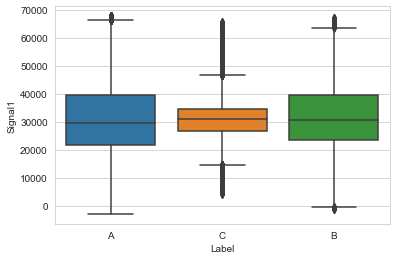

In [92]:
sns.boxplot(x="Label",y="Signal1",data=df)
plt.show()

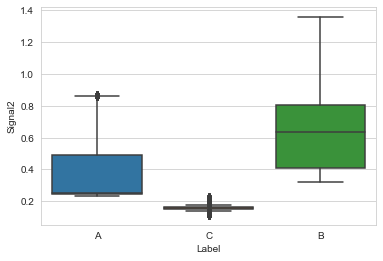

In [93]:
sns.boxplot(x="Label",y="Signal2",data=df)
plt.show()

# Violin Plots

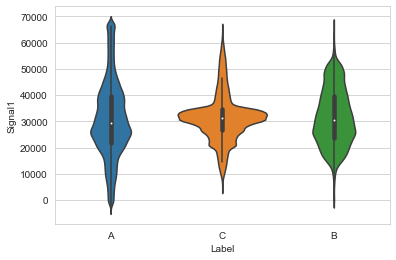

In [94]:
sns.violinplot(x="Label",y="Signal1",data=df,size=8)
plt.show()

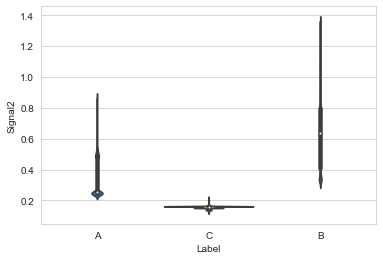

In [95]:
sns.violinplot(x="Label",y="Signal2",data=df,size=8)
plt.show()

# Multivariate probability density and contour plot

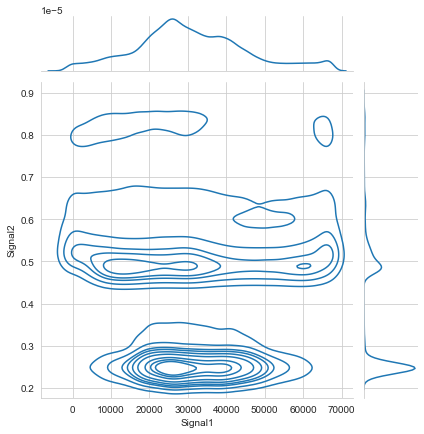

In [96]:
sns.jointplot(x="Signal1", y="Signal2", data=df_A, kind="kde")
plt.show()

Observations:
1. In this 2d plot lower layer indicates more points and light layers or hills is called less points.
2. These lighter to denser lines is called contours. This graph is called Contours probability density plot.

# Summarizing EDA

# UniVarient Analysis:

PDF/Histograms

CDF

Box Plot

Violin Plot


# BiVarient Analysis:

Scatter Plot

Pair Plot

# MultiVariant Analysis:

We can use 3D plot.

But since there are two feature Signal1 and Signal2 we can't plot 3-D Diagram, to make 3D plot we required one more dimension 
or feature